<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Activity_Recognition_EEG__Final_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Function

In [167]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Starting

In [168]:
import numpy as np
import pandas as pd
#dataset=pd.read_csv("/content/drive/MyDrive/EEG_CNU_Activity Recognition/EEG_CNU_Resting, walking, working and Reading_Control_2022.12.05.csv")
 
dataset=pd.read_excel("/content/drive/MyDrive/Iqram Sir/EEG_CNU_Resting, walking, working and Reading_Control_2022.12.22.xlsx")

target = "Activity"
result = {}

In [169]:
dataset.head()

,Activity,Status,Epoch,MeanP_Alpha_Fz,MedianF_Alpha_Fz,MeanF_Alpha_Fz,Spectral Edge_Alpha_Fz,PeakF_Alpha_Fz,MeanP_Beta_Fz,MedianF_Beta_Fz,...,Relative Power_Alpha_Global,Relative Power_Beta_Global,Relative Power_Theta_Global,Relative Power_Delta_Global,Relative Power_Gamma_Global,∆Relative Power_Alpha_Global,∆Relative Power_Beta_Global,∆Relative Power_Theta_Global,∆Relative Power_Delta_Global,∆Relative Power_Gamma_Global
0,Resting,Control,0,0.000008,11.70732,28.29268,20.00000,10.73171,0.000017,19.51220,...,0.358154,0.639771,0.749628,4.031903,0.220545,-0.273666,-0.164639,-0.009611,0.107193,-0.356230
1,Resting,Control,1,0.000010,10.73171,28.78049,22.43902,10.24390,0.000023,22.92683,...,0.457695,0.806208,0.723662,3.759249,0.253186,-0.071797,0.052680,-0.043916,0.032320,-0.260950
2,Resting,Control,2,0.000008,13.17073,28.78049,23.41463,9.26829,0.000023,22.43902,...,0.501419,1.059244,0.737332,3.320235,0.381769,0.016875,0.383074,-0.025855,-0.088237,0.114385
3,Resting,Control,3,0.000011,10.24390,27.80488,18.53659,10.73171,0.000019,22.43902,...,0.497909,0.710690,0.907816,3.653423,0.230162,0.009757,-0.072039,0.199384,0.003259,-0.328157
4,Resting,Control,4,0.000007,10.73171,23.41463,18.04878,11.70732,0.000010,17.56098,...,0.429825,0.569204,0.849345,4.001597,0.150029,-0.128318,-0.256780,0.122134,0.098870,-0.562065


In [170]:
dataset.shape

(1711, 259)

In [171]:
dataset[target].value_counts()

Reading    793
Walking    408
Working    267
Resting    243
Name: Activity, dtype: int64

In [172]:
set(list(dataset['Activity']))

{'Reading', 'Resting', 'Walking', 'Working'}

In [173]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [174]:
set(list(dataset['Activity']))

{0, 1, 2, 3}

###Spliting into X and y

In [175]:
X =  dataset.loc[:,dataset.columns != target]  # removing Activity 
X =  X.loc[:,X.columns != "Status"]            # removing Status
X =  X.loc[:,X.columns != "Epoch"]             # removing Epoch
y = dataset["Activity"]

X.head(10)

,MeanP_Alpha_Fz,MedianF_Alpha_Fz,MeanF_Alpha_Fz,Spectral Edge_Alpha_Fz,PeakF_Alpha_Fz,MeanP_Beta_Fz,MedianF_Beta_Fz,MeanF_Beta_Fz,Spectral Edge_Beta_Fz,PeakF_Beta_Fz,...,Relative Power_Alpha_Global,Relative Power_Beta_Global,Relative Power_Theta_Global,Relative Power_Delta_Global,Relative Power_Gamma_Global,∆Relative Power_Alpha_Global,∆Relative Power_Beta_Global,∆Relative Power_Theta_Global,∆Relative Power_Delta_Global,∆Relative Power_Gamma_Global
0,0.000008,11.70732,28.29268,20.00000,10.73171,0.000017,19.51220,38.04878,32.68293,19.02439,...,0.358154,0.639771,0.749628,4.031903,0.220545,-0.273666,-0.164639,-0.009611,0.107193,-0.356230
1,0.000010,10.73171,28.78049,22.43902,10.24390,0.000023,22.92683,38.53659,33.65854,23.41463,...,0.457695,0.806208,0.723662,3.759249,0.253186,-0.071797,0.052680,-0.043916,0.032320,-0.260950
2,0.000008,13.17073,28.78049,23.41463,9.26829,0.000023,22.43902,37.56098,31.70732,17.56098,...,0.501419,1.059244,0.737332,3.320235,0.381769,0.016875,0.383074,-0.025855,-0.088237,0.114385
3,0.000011,10.24390,27.80488,18.53659,10.73171,0.000019,22.43902,38.04878,32.68293,28.29268,...,0.497909,0.710690,0.907816,3.653423,0.230162,0.009757,-0.072039,0.199384,0.003259,-0.328157
4,0.000007,10.73171,23.41463,18.04878,11.70732,0.000010,17.56098,36.09756,29.26829,11.70732,...,0.429825,0.569204,0.849345,4.001597,0.150029,-0.128318,-0.256780,0.122134,0.098870,-0.562065
5,0.000008,10.24390,23.41463,17.56098,10.24390,0.000010,18.04878,36.09756,29.26829,17.07317,...,0.494096,0.687221,0.812251,3.785048,0.221383,0.002023,-0.102682,0.073126,0.039404,-0.353782
6,0.000005,11.21951,24.39024,17.56098,12.68293,0.000007,17.07317,38.04878,31.21951,14.14634,...,0.527217,0.668711,0.770164,3.853441,0.180467,0.069192,-0.126852,0.017521,0.058186,-0.473217
7,0.000005,9.75610,25.85366,18.53659,7.80488,0.000007,19.02439,35.60976,29.75610,13.17073,...,0.475599,0.719244,0.764508,3.833454,0.207195,-0.035489,-0.060870,0.010050,0.052697,-0.395197
8,0.000006,10.24390,24.39024,17.56098,8.29268,0.000009,17.56098,36.09756,29.26829,17.56098,...,0.482293,0.620810,0.933737,3.798965,0.164195,-0.021913,-0.189396,0.233631,0.043226,-0.520716
9,0.000014,11.21951,23.41463,18.04878,12.68293,0.000021,18.04878,35.60976,29.26829,12.68293,...,0.659929,0.855344,1.188749,3.079654,0.216324,0.338331,0.116839,0.570546,-0.154303,-0.368549


###USing SMOTE for balancing

In [176]:
new_dataset =  balance(X,y)

In [177]:
new_dataset[target].value_counts()

1    793
2    793
0    793
3    793
Name: Activity, dtype: int64

#Feature Selection

In [178]:
number_of_feat = 20

###ANOVA with f classifciation

In [184]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA'] 

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])

###Embedded Method

In [183]:

from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

list_of_feat=[]


for i in range(coef.shape[0]):
  if coef[i]!=0:
    list_of_feat.append(dataset.iloc[:0,i+3].name)
    
df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Embedded_Method.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4267169530156707, tolerance: 0.21672448830409385

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5367691825176735, tolerance: 0.21672448830409385

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.44178979448417977, tolerance: 0.21672448830409385

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.43952068898738617, tolerance:

KeyboardInterrupt: ignored

###Pearson's with f regression

In [181]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd


fs = SelectKBest(score_func=f_regression, k=5)
fit = fs.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_pearsons'] 


lyst = featureScores.nlargest(number_of_feat,'Score_pearsons')

#lyst.to_csv('Filter_Method_Pearson’s_with_f_regression.csv')

list_of_feat = list(lyst["Best_columns"])

###Sequential Feature Selection

In [182]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X, y)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(X.columns))

df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Filter_Method_Sequential_feat_Selection_KNN.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]

KeyboardInterrupt: ignored

###All features

In [ ]:
list_of_feat = list(X.columns)

#Data Spliting

In [ ]:
X_new = new_dataset[list_of_feat]
y_new = new_dataset[target]

In [ ]:
X_new.shape

In [ ]:
y_new.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)



---





---



#ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
N=90
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)



---



---



#Graddient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=175
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=14
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)



---



---



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)



---



---



#XGB

In [232]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train.values,y_train.values)
y_pred = xgb_deafult.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[105  34  19   5]
 [ 30 100   9   6]
 [ 30  18  95  25]
 [  6  11  12 130]]
              precision    recall  f1-score   support

           0       0.61      0.64      0.63       163
           1       0.61      0.69      0.65       145
           2       0.70      0.57      0.63       168
           3       0.78      0.82      0.80       159

    accuracy                           0.68       635
   macro avg       0.68      0.68      0.68       635
weighted avg       0.68      0.68      0.68       635

Accurecy:  0.6771653543307087


1/250 round completed......................... Accurecy: 0.5496062992125984
2/250 round completed......................... Accurecy: 0.5496062992125984
3/250 round completed......................... Accurecy: 0.552755905511811
4/250 round completed......................... Accurecy: 0.5543307086614173
5/250 round completed......................... Accurecy: 0.5559055118110237
6/250 round completed......................... Accurecy: 0.5574803149606299
7/250 round completed......................... Accurecy: 0.5622047244094488
8/250 round completed......................... Accurecy: 0.5606299212598426
9/250 round completed......................... Accurecy: 0.5622047244094488
10/250 round completed......................... Accurecy: 0.5622047244094488
11/250 round completed......................... Accurecy: 0.5716535433070866
12/250 round completed......................... Accurecy: 0.5700787401574803
13/250 round completed......................... Accurecy: 0.5700787401574803
14/250 ro

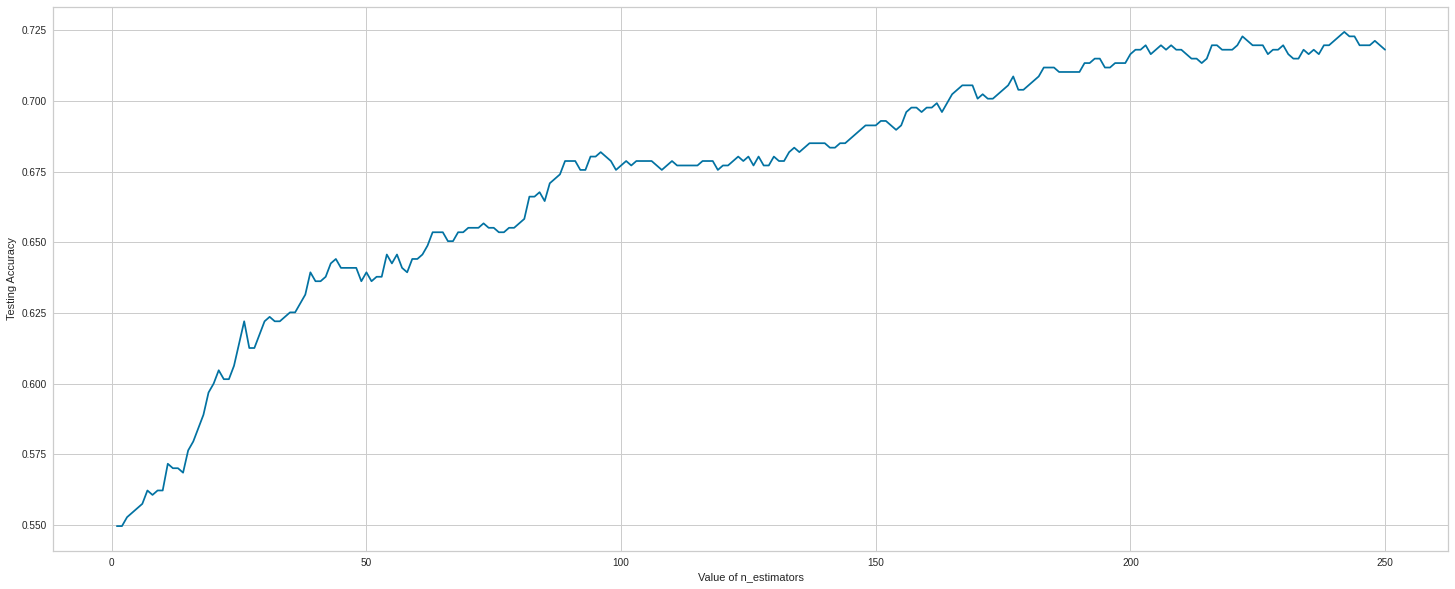

In [233]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.5779527559055118
2/30 round completed......................... Accurecy: 0.6330708661417322
3/30 round completed......................... Accurecy: 0.6771653543307087
4/30 round completed......................... Accurecy: 0.7149606299212599
5/30 round completed......................... Accurecy: 0.7464566929133858
6/30 round completed......................... Accurecy: 0.752755905511811
7/30 round completed......................... Accurecy: 0.7763779527559055
8/30 round completed......................... Accurecy: 0.7653543307086614
9/30 round completed......................... Accurecy: 0.7811023622047244
10/30 round completed......................... Accurecy: 0.7763779527559055
11/30 round completed......................... Accurecy: 0.7811023622047244
12/30 round completed......................... Accurecy: 0.7779527559055118
13/30 round completed......................... Accurecy: 0.768503937007874
14/30 round completed..

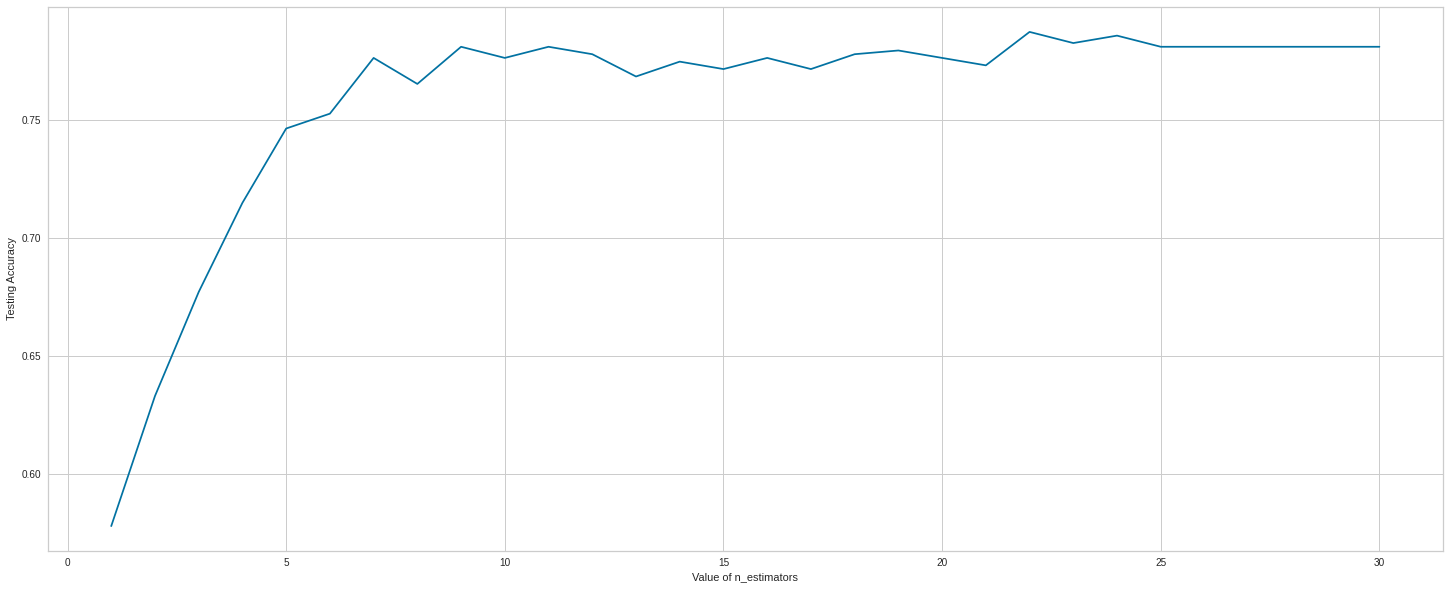

In [234]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [235]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[121  20  19   3]
 [ 16 121   5   3]
 [ 25   7 122  14]
 [  3   6  14 136]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       163
           1       0.79      0.83      0.81       145
           2       0.76      0.73      0.74       168
           3       0.87      0.86      0.86       159

    accuracy                           0.79       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7874015748031497
XGBClassifier(max_depth=22, objective='multi:softprob')


In [236]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train.values,y_train.values)
y_pred = xgb_estimator.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[117  24  18   4]
 [ 20 112   8   5]
 [ 26  17 100  25]
 [  4  12  12 131]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       163
           1       0.68      0.77      0.72       145
           2       0.72      0.60      0.65       168
           3       0.79      0.82      0.81       159

    accuracy                           0.72       635
   macro avg       0.72      0.73      0.72       635
weighted avg       0.73      0.72      0.72       635

Accurecy:  0.7244094488188977
XGBClassifier(n_estimators=242, objective='multi:softprob')


In [237]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train.values,y_train.values)
y_pred = xgb_all.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[118  21  22   2]
 [ 16 121   5   3]
 [ 23  10 119  16]
 [  3   5  13 138]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       163
           1       0.77      0.83      0.80       145
           2       0.75      0.71      0.73       168
           3       0.87      0.87      0.87       159

    accuracy                           0.78       635
   macro avg       0.78      0.78      0.78       635
weighted avg       0.78      0.78      0.78       635

Accurecy:  0.7811023622047244


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

#NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)



---



---



#Result

In [191]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


XGBClassifier(objective='multi:softprob') 4  :  0.6771653543307087
---------------------------------------------------------------

XGBClassifier(max_depth=22, objective='multi:softprob') 4  :  0.7874015748031497
---------------------------------------------------------------

XGBClassifier(n_estimators=242, objective='multi:softprob') 4  :  0.7244094488188977
---------------------------------------------------------------

XGBClassifier(max_depth=22, n_estimators=242, objective='multi:softprob') 4  :  0.7811023622047244
---------------------------------------------------------------



In [192]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(XGBClassifier(max_depth=22, objective='multi:softprob'), 4, 'xgboost')   :  0.7874015748031497
-------------------------------------------------------------------------------------------------
(XGBClassifier(max_depth=22, n_estimators=242, objective='multi:softprob'), 4, 'xgboost')   :  0.7811023622047244
-------------------------------------------------------------------------------------------------
(XGBClassifier(n_estimators=242, objective='multi:softprob'), 4, 'xgboost')   :  0.7244094488188977
-------------------------------------------------------------------------------------------------
(XGBClassifier(objective='multi:softprob'), 4, 'xgboost')   :  0.6771653543307087
-------------------------------------------------------------------------------------------------
[(XGBClassifier(max_depth=22, objective='multi:softprob'), 4, 'xgboost'), (XGBClassifier(max_depth=22, n_estimators=242, objective='multi:softprob'), 4, 'xgboost'), (XGBClassifier(n_estimators=242, objective='multi:s

In [193]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(XGBClassifier(max_depth=22, objective='multi:softprob'), 'xgboost')


In [194]:
len(best_models)

1

#Testing Accuracy For Best 4 Models

In [195]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_train)
  print(confusion_matrix(y_train, y_pred))
  print(classification_report(y_train,y_pred))
  print("Accurecy: ",accuracy_score(y_train, y_pred))

--------------------------------------------------
XGBClassifier(max_depth=22, objective='multi:softprob')
[[630   0   0   0]
 [  0 648   0   0]
 [  0   0 624   1]
 [  0   0   4 630]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       630
           1       1.00      1.00      1.00       648
           2       0.99      1.00      1.00       625
           3       1.00      0.99      1.00       634

    accuracy                           1.00      2537
   macro avg       1.00      1.00      1.00      2537
weighted avg       1.00      1.00      1.00      2537

Accurecy:  0.9980291683090264


#SHAP

In [196]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [197]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

In [198]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=22, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=242, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=22, n_estimators=242, objective='multi:softprob')",…

In [199]:
graph_feat={
    "max_display":20,
    "shap_values Index":2
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [200]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=22, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=242, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=22, n_estimators=242, objective='multi:softprob')",…

In [201]:

from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'])

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#Confusion Matrix For Training

In [202]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=22, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=242, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=22, n_estimators=242, objective='multi:softprob')",…

In [203]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'])

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#ROC FOR MULTICLASS

In [204]:
!pip install plotly==5.11.0
!pip install -U kaleido


import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC(model,X,y,fig_name):
    
    lebel_dict={
    0: 'Reading',
    1: 'Resting',
    2: 'Walking',
    3: 'Working'
    }

    y_scores = model.predict_proba(X)

    y_onehot = pd.get_dummies(y, columns=model.classes_)

    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=1000, height=1000,
        font=dict(
            family="Courier New, monospace",
            size=20,
            color="BLack"
        ),
        legend=dict(
            x=0.67,
            y=0.05,
            traceorder="reversed",
            title_font_family="Times New Roman",
            font=dict(
                family="Courier New, monospace",
                size=20,
                color="black"
            ),
            bgcolor="LightSteelBlue",
            bordercolor="White",
            borderwidth=2
        )
    )
    fig.show()
    fig.write_image(fig_name+".png")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [205]:
new_keys_9=models_check_box(models)

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=22, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=242, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=22, n_estimators=242, objective='multi:softprob')",…

In [206]:
for i in range(len(new_keys_9)):
  if new_keys_9[i].value ==True:
    print(models[i])
    ploty_ROC(models[i],X_new,y_new,str(models[i]))
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Cross_val_score function

In [207]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new, y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

XGBClassifier(objective='multi:softprob')  -> Accuracy:  0.6771653543307087
XGBClassifier(objective='multi:softprob')  -> AVG Accurecy After CV: 0.6636448992771803 (For 5 Fold)
--------------------------------------------------------------------------
XGBClassifier(max_depth=22, objective='multi:softprob')  -> Accuracy:  0.7874015748031497
XGBClassifier(max_depth=22, objective='multi:softprob')  -> AVG Accurecy After CV: 0.7585613154822525 (For 5 Fold)
--------------------------------------------------------------------------
XGBClassifier(n_estimators=242, objective='multi:softprob')  -> Accuracy:  0.7244094488188977
XGBClassifier(n_estimators=242, objective='multi:softprob')  -> AVG Accurecy After CV: 0.6958146004620085 (For 5 Fold)
--------------------------------------------------------------------------
XGBClassifier(max_depth=22, n_estimators=242, objective='multi:softprob')  -> Accuracy:  0.7811023622047244
XGBClassifier(max_depth=22, n_estimators=242, objective='multi:softprob'

# **LIME**

In [208]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [238]:

  def LIME_EXP(model,row):
    import lime
    from lime import lime_tabular


    if str(model)[:3] == "XGB":

      explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=list(list(X_new.columns)),                                         
        class_names=['Reading', 'Resting', 'Walking', 'Working']
        )
      
      exp = explainer.explain_instance(X_test.iloc[row],
                                 model.predict_proba,
                                 num_features=6,
                                 top_labels=4)



    else:
      explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=list(X_new.columns),
        class_names=['Reading', 'Resting', 'Walking', 'Working'],
        mode='classification'
        )

      exp = explainer.explain_instance(X_test.iloc[row],
                                      model.predict_proba,               #here write the model name
                                      num_features=6,
                                    top_labels=4)
    

    exp.show_in_notebook(show_table=True, show_all=True)



    import matplotlib.pyplot as plt
    with plt.style.context("ggplot"):
        exp.as_pyplot_figure()


    from IPython.display import HTML
    html_data = exp.as_html()
    HTML(data=html_data)

    exp.save_to_file(str(model)+".html")

In [239]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME


new_keys_8=models_check_box(models)

Enter the index of row to explain: 20


Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=22, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=242, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=22, n_estimators=242, objective='multi:softprob')",…

In [243]:
models

[XGBClassifier(objective='multi:softprob'),
 XGBClassifier(max_depth=22, objective='multi:softprob'),
 XGBClassifier(n_estimators=242, objective='multi:softprob'),
 XGBClassifier(max_depth=22, n_estimators=242, objective='multi:softprob')]

In [241]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    print(models[i])
    #LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

XGBClassifier(objective='multi:softprob')
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------


In [226]:
import lime
from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,  # fitted_df.iloc[:,:-1].values.astype(float),
                                                   feature_names=list(X_new.columns),
                                                   class_names=['Reading', 'Resting', 'Walking', 'Working'])

In [220]:
type()

numpy.ndarray

In [ ]:
exp = explainer.explain_instance(X_test.iloc[10],
                                 XGBClassifier(objective='multi:softprob').predict_proba,
                                 num_features=6,
                                 top_labels=2)

exp.show_in_notebook(show_table=True, show_all=False)